In [1]:
from mnist import MNIST

mndata = MNIST('MNIST_data')

In [2]:
# Datos de entrenamiento

datos, labels = mndata.load_training()

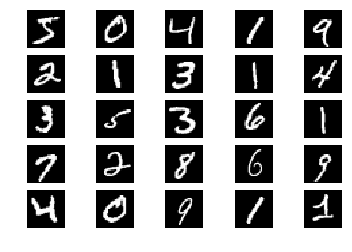

In [3]:
# visualizacion
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.gray()

for i in range(25):
    plt.subplot(5, 5, i+1)
    
    d_image = np.array(datos[i], dtype='float')
    
    pixels = d_image.reshape((28, 28))
    
    plt.imshow(pixels, cmap='gray')
    plt.axis('off')
    
plt.show()

In [4]:
# dividimos los datos en entrenamiento y validación
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(datos, labels, test_size=0.3, random_state=42)

<div class='alert alert-info'>
<h3>Modelos y entrenamientos.</h3>
<ul>
    <li>Decision tree.</li>
    <li>Random forets.</li>
</ul>
</div>

In [5]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()

# Entrenamos el clasificador
clf_dt.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<div class='alert alert-warning'>
<b>Evaluación</b> Con matriz de confusión
</div>

In [6]:
from sklearn.metrics import confusion_matrix

In [7]:
# Definimos función para evaluar el clasificado.

def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    
    MC = confusion_matrix(test_labels, pred)
    return MC

In [8]:
# Evaluamos el clasificador

MC = evaluate_classifier(clf_dt, test_data, test_labels)
print(MC)

[[1634    1   23   19   16   32   30    8   31   11]
 [   2 1906   23   17    4    2    8    8   14   10]
 [  22   33 1452   48   19   25   54   48   45   13]
 [  18   14   54 1503   13   84   11   36   72   41]
 [   6    7   12   15 1506   22   15   34   23   86]
 [  34   11   21   84   12 1328   35   13   72   43]
 [  22    9   26    8   30   40 1603    2   37   10]
 [   8    7   39   19   25   18    3 1758   21   39]
 [  18   25   59   58   40   58   34   23 1348   67]
 [  11    9   16   35   87   49   10   60   50 1436]]


In [11]:
# Calculamos el score
score = MC.diagonal().sum()*100/MC.sum()
score

85.96666666666667

<div class='alert alert-warning'>
<h5>Ahora usemos Random Forets para ver si mejora</h5>
</div>

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
"""
n_estimators      -> Número de arboles en la red.
min_samples_split -> Número mínimo de filas.
min_samples_leaft -> Número mínimo de samples al final del árbol.
"""

clf_rf = RandomForestClassifier(n_estimators=150, min_samples_split=2 )

In [17]:
# Entremanos
clf_rf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
# Evaluemos el clasificador
MC = evaluate_classifier(clf_rf, test_data, test_labels)
MC

array([[1779,    0,    2,    1,    3,    4,    6,    0,    8,    2],
       [   0, 1962,   15,    6,    3,    0,    2,    4,    1,    1],
       [   6,    5, 1708,    6,    7,    0,    4,   14,    6,    3],
       [   3,    1,   32, 1744,    1,   24,    1,   17,   14,    9],
       [   3,    2,    1,    1, 1683,    0,    6,    3,    2,   25],
       [  10,    3,    2,   16,    3, 1585,   14,    1,   13,    6],
       [   3,    1,    0,    0,    4,    9, 1764,    0,    6,    0],
       [   2,   11,   25,    0,    9,    0,    0, 1871,    4,   15],
       [   1,    6,    9,   11,   13,   13,    7,    1, 1656,   13],
       [   9,    3,    5,   14,   23,    6,    2,   15,    6, 1680]])

In [20]:
# score

score = MC.diagonal().sum()*100/MC.sum()
score

96.84444444444445

<div class='alert alert-warning'>
Mejoro mucho el score usando 150 arboles.
</div>

<div class='alert alert-info'>
<h3>Pruebas</h3>
Ahora usaremos el clasificador de random forets para ver como se ocmporta con nuevos datos.
</div>

In [21]:
# cargamos datos de test

test_data, test_labels = mndata.load_testing()

In [22]:
# Aplicamos el clasificado a todo  el dataset y obtenemos el accuracy

predicted = clf_rf.predict(test_data)

In [25]:
MC = evaluate_classifier(clf_rf, test_data, np.array(test_labels))
MC

array([[ 970,    0,    0,    0,    0,    3,    2,    1,    4,    0],
       [   0, 1122,    3,    3,    0,    2,    2,    0,    2,    1],
       [   6,    0,  997,    5,    2,    1,    5,    9,    7,    0],
       [   0,    0,   13,  967,    0,    9,    0,    9,    9,    3],
       [   1,    0,    2,    0,  955,    0,    4,    0,    3,   17],
       [   5,    0,    0,   13,    1,  856,    7,    2,    5,    3],
       [   7,    3,    0,    0,    3,    3,  941,    0,    1,    0],
       [   1,    4,   24,    3,    1,    0,    0,  981,    2,   12],
       [   3,    0,    5,   10,    4,    6,    4,    4,  927,   11],
       [   7,    5,    2,    9,   13,    2,    1,    5,    7,  958]])

In [26]:
score = MC.diagonal().sum()*100/MC.sum()
score

96.74

### Una prueba más

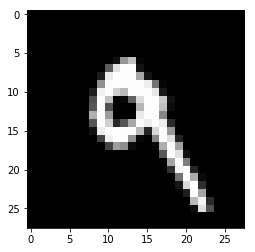

In [28]:
d = np.array(test_data[7], dtype='float')
pixels = d.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [30]:
print(clf_rf.predict([test_data[7]]))

[9]
